In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [3]:
train = pd.read_csv('train_preprocessed.csv')
test = pd.read_csv('test_preprocessed.csv')


In [4]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,False,True
1,1,1,1,38.0,1,0,71.2833,1,False,False
2,1,3,1,26.0,0,0,7.9250,0,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,True
4,0,3,0,35.0,0,0,8.0500,0,False,True


In [5]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,True,False
1,3,1,47.0,1,0,7.0000,0,False,True
2,2,0,62.0,0,0,9.6875,0,True,False
3,3,0,27.0,0,0,8.6625,0,False,True
4,3,1,22.0,1,1,12.2875,0,False,True


In [6]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Has_Cabin     0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
test.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Has_Cabin     0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
x_train = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Has_Cabin','Embarked_Q','Embarked_S']]
y_train = train['Survived']


In [9]:
x_test=test[['Pclass','Sex','Age','SibSp','Parch','Fare','Has_Cabin','Embarked_Q','Embarked_S']]


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)



KNeighborsClassifier()

In [13]:
y_pred_train=knn.predict(x_train)
print('predictions of test data:',y_pred_train)

predictions of test data: [0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0

In [14]:
print(classification_report(y_train,y_pred_train))

Cm= confusion_matrix(y_train,y_pred_train)
print('Confusion matrix:',Cm)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       535
           1       0.75      0.66      0.70       302

    accuracy                           0.80       837
   macro avg       0.79      0.77      0.78       837
weighted avg       0.80      0.80      0.80       837

Confusion matrix: [[468  67]
 [102 200]]


In [15]:
parameters = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn_grid.fit(x_train, y_train)

print("Best parameters found: ", knn_grid.best_params_)
print("Best score found: ", knn_grid.best_score_)

Best parameters found:  {'n_neighbors': 3}
Best score found:  0.7145494724836043


In [16]:
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred_train = best_knn.predict(x_train)

In [18]:
print(classification_report(y_train,y_pred_train))
Cm= confusion_matrix(y_train,y_pred_train)
print('Confusion matrix:',Cm)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       535
           1       0.81      0.74      0.78       302

    accuracy                           0.85       837
   macro avg       0.84      0.82      0.83       837
weighted avg       0.84      0.85      0.84       837

Confusion matrix: [[484  51]
 [ 78 224]]


In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [20]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_resampled, y_resampled)


KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_train2 = knn.predict(X_resampled)


In [23]:
print(classification_report(y_resampled, y_pred_train2))
cm = confusion_matrix(y_pred_train2, y_resampled)
print("مصفوفة الالتباس:", cm)


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       535
           1       0.86      0.88      0.87       535

    accuracy                           0.87      1070
   macro avg       0.87      0.87      0.87      1070
weighted avg       0.87      0.87      0.87      1070

مصفوفة الالتباس: [[458  63]
 [ 77 472]]


In [24]:
y_pred = knn.predict(x_test)


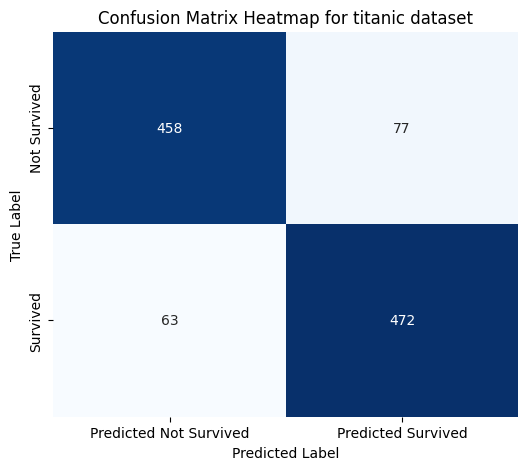

In [25]:
cm_train = confusion_matrix(y_resampled, y_pred_train2)
cm_train_df = pd.DataFrame(cm_train, 
                            index=['Not Survived', 'Survived'],  
                            columns=['Predicted Not Survived', 'Predicted Survived'])

plt.figure(figsize=(6,5))
sns.heatmap(cm_train_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap for titanic dataset')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [26]:
submission = pd.DataFrame({
    'Id': x_test.index,  
    'Prediction': y_pred
})

submission.to_csv('submission.csv', index=False)

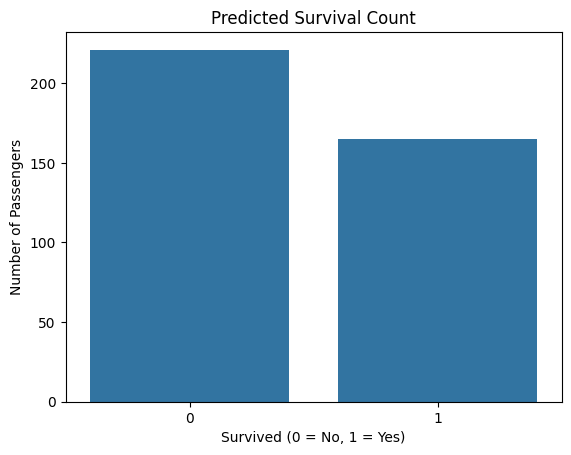

In [27]:
sns.countplot(x=y_pred)
plt.title("Predicted Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

In [28]:
import numpy as np

unique, counts = np.unique(y_pred, return_counts=True)
percentages = counts / len(y_pred) * 100

for label, pct in zip(unique, percentages):
    print(f"Class {label}: {pct:.2f}%")


Class 0: 57.25%
Class 1: 42.75%


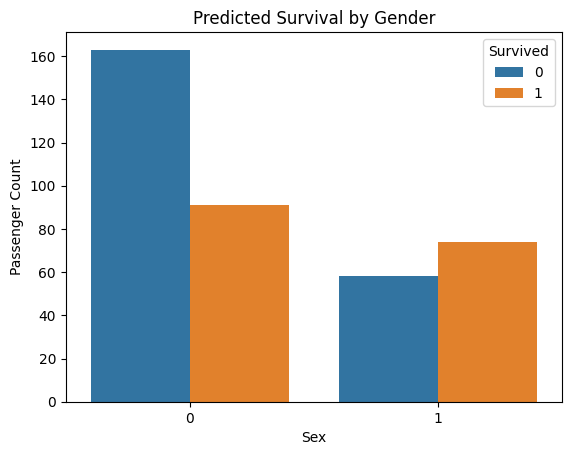

In [29]:
test['Predicted_Survived'] = y_pred

sns.countplot(x='Sex', hue='Predicted_Survived', data=test)
plt.title("Predicted Survival by Gender")
plt.ylabel("Passenger Count")
plt.xlabel("Sex")
plt.legend(title="Survived")
plt.show()